In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import matplotlib.animation as animation
import csv
matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
# from wordcloud import WordCloud

from mpl_toolkits.mplot3d import Axes3D

In [2]:
blog_data=pd.read_csv("blogtext.csv")

In [3]:
blog_data.sample(20)

,id,gender,age,topic,sign,date,text
461445,3639395,female,42,Government,Aquarius,"15,June,2004",I can't get the thing to show...
675803,1912994,female,27,Technology,Libra,"04,August,2004",stanley needs a tan
53739,899153,female,27,Religion,Gemini,"06,June,2003",The Baghdad Blogger After hearing so ...
432408,722746,female,48,indUnk,Cancer,"15,July,2003",Random Questions; Random Day...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
369024,1609589,male,16,Student,Capricorn,"04,June,2004","ok! Dustin, Jesse, quit kicking eachoth..."
662667,1975546,female,23,indUnk,Aries,"10,August,2004",but what about the god hates shrimp...
585252,1636651,female,39,indUnk,Capricorn,"05,October,2003","I woke this morning lazily, stretching ..."
399171,2967037,female,15,indUnk,Capricorn,"13,July,2004","Hahaha, this is great, and su..."
268872,1325355,female,26,indUnk,Cancer,"16,September,2003",. . . in the PowerBook market right...


In [4]:
blog_data.loc[blog_data.index==181517,:]#"05,Dezember,2003"

,id,gender,age,topic,sign,date,text
181517,3064468,female,24,Engineering,Libra,"05,Dezember,2003",finally got around to staring up the bo...


In [5]:
blog_data.drop_duplicates(subset="text",inplace=True)
blog_data["date_post"] = pd.to_datetime(blog_data.date,format="%d,%B,%Y", errors='coerce')#pd.to_datetime(blog_data.date,errors="coerce",infer_datetime_format=True)
print(blog_data.shape)
blog_data.head(20)

(611652, 8)


,id,gender,age,topic,sign,date,text,date_post
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",2004-05-14
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,2004-05-13
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,2004-05-12
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,2004-05-12
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,2004-06-11
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...,2004-06-10
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...,2004-06-10
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o...",2004-06-10
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...,2004-06-10
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...,2004-06-09


In [6]:
# blog_data.date.head()
pd.to_datetime("2005-01-01")#,errors="coerce",infer_datetime_format=True)

Timestamp('2005-01-01 00:00:00')

In [7]:
fechas_df=pd.DataFrame(np.array(blog_data["id"]), index=blog_data["date_post"]) 
fechas_df["ocurr"]=1
fechas_df.columns=["id","ocurr"]
fechas_df.head()

,id,ocurr
date_post,,
2004-05-14,2059027,1
2004-05-13,2059027,1
2004-05-12,2059027,1
2004-05-12,2059027,1
2004-06-11,3581210,1


In [8]:
tot_blg_fechas=fechas_df.ocurr.resample("1D").sum()
tot_blg_fechas.head()

date_post
1999-01-01    6
1999-01-02    0
1999-01-03    0
1999-01-04    0
1999-01-05    0
Name: ocurr, dtype: int64

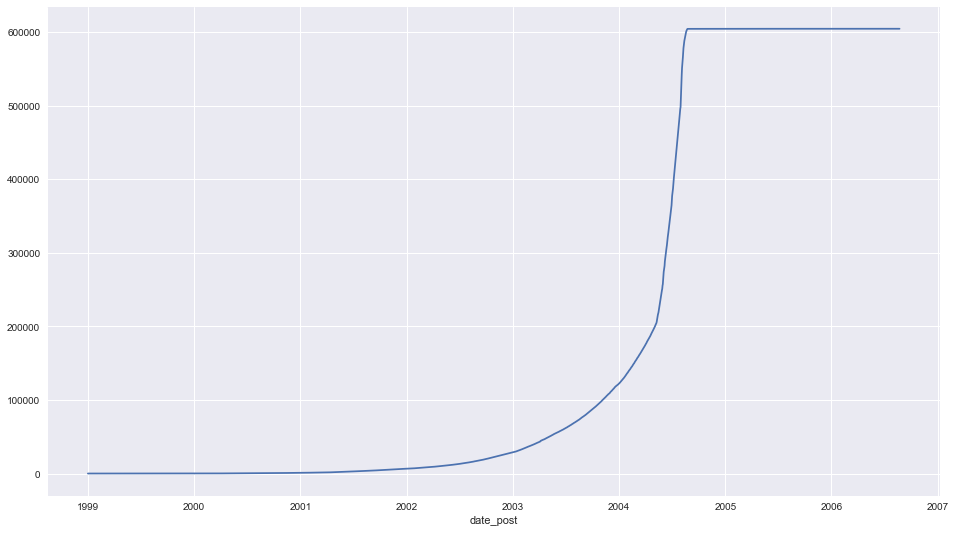

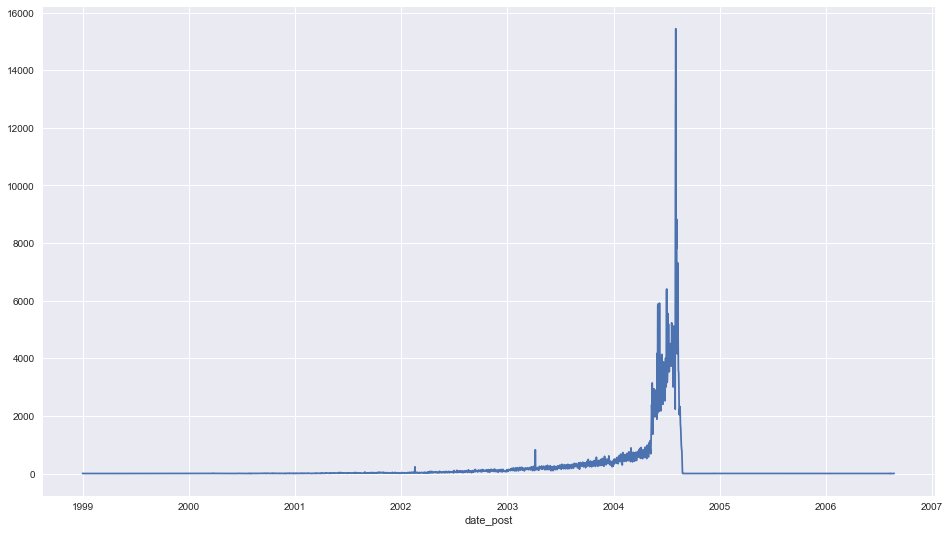

In [9]:
plt.figure(figsize=(16,9))
tot_blg_fechas.cumsum().plot()#kind="bar")
plt.show()

plt.figure(figsize=(16,9))
tot_blg_fechas.plot()#kind="bar")
plt.show()

In [10]:
tot_blg_fechas.index.max()

Timestamp('2006-08-23 00:00:00')

In [11]:
dia_sem_post=np.array(blog_data.date_post.dt.weekday)
mes_post=np.array(blog_data.date_post.dt.month)
dia_mes_post=np.array(blog_data.date_post.dt.day)
dia_yr_post=np.array(blog_data.date_post.dt.dayofyear)
sem_yr_post=np.array(blog_data.date_post.dt.weekofyear)
yr_post=np.array(blog_data.date_post.dt.year)


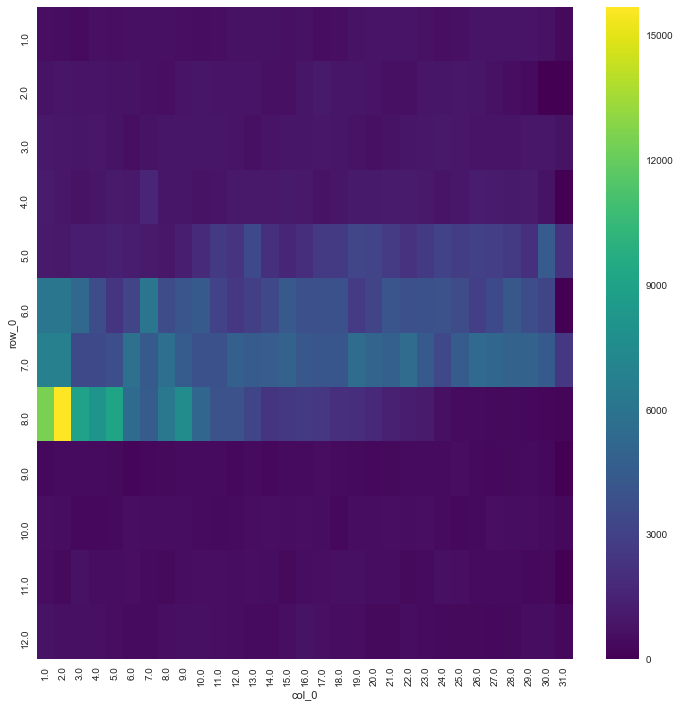

In [17]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(pd.crosstab(index=mes_post,
                             columns=dia_mes_post),
                 cmap="viridis")#, linewidths=.5)

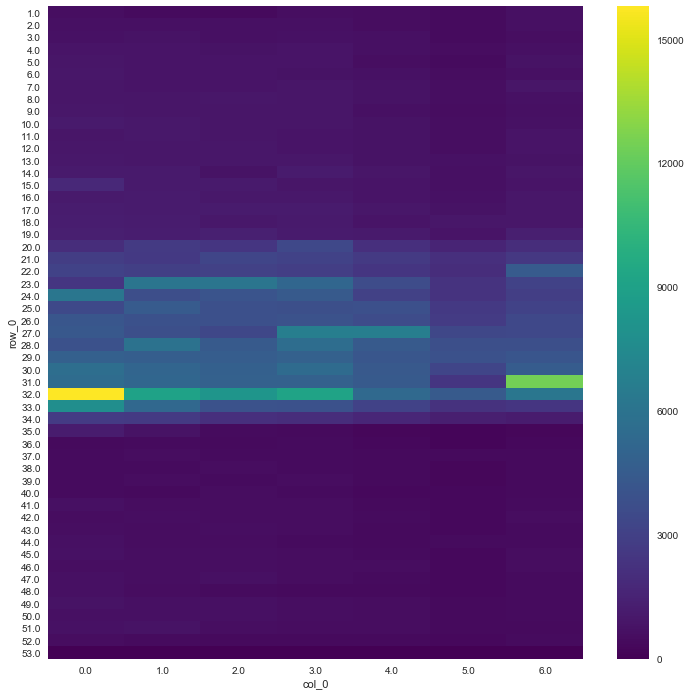

In [16]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(pd.crosstab(index=sem_yr_post,
                             columns=dia_sem_post),
                 cmap="viridis")#, linewidths=.5)